# E-Commerce Sales Analysis Project

Project Description: This project focuses on analyzing e-commerce sales data to uncover key business insights and support data-driven decision-making. 
The project utilizes Python libraries like Pandas, Matplotlib, and Seaborn for data analysis and visualization.

Objectives:

Understand sales patterns and trends.
Identify top-performing products, customers, and regions.
Provide actionable recommendations to boost sales and optimize operations.

# How Analysis Helps to Grow Sales
Optimize Inventory Management: By understanding product demand by category and region, e-commerce platforms can reduce overstock and understock situations.
Enhance Customer Retention: Analyzing repeat customer data helps design loyalty programs and targeted offers.
Improve Marketing Strategies: Insights on top-performing cities and peak sales days help allocate resources effectively for advertising.
Boost Average Order Value (AOV): Identifying opportunities for cross-selling and upselling based on purchasing patterns.
Seasonal Promotions: Sales trends over time can inform the timing of discounts and promotional campaigns.

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv("ecommerce_sales_data.csv")

# Data Exploration

In [3]:
df

,OrderID,CustomerID,ProductID,Category,Quantity,Price,OrderDate,City,TotalSales
0,ORD000001,CUST8761,PROD694,Sports,3,19.96,2023-01-01 00:00:00,Phoenix,59.88
1,ORD000002,CUST2566,PROD633,Books,3,119.51,2023-01-01 01:00:00,Chicago,358.53
2,ORD000003,CUST6289,PROD502,Home & Kitchen,3,367.50,2023-01-01 02:00:00,Chicago,1102.50
3,ORD000004,CUST8046,PROD618,Books,4,70.56,2023-01-01 03:00:00,Phoenix,282.24
4,ORD000005,CUST3223,PROD314,Books,5,101.42,2023-01-01 04:00:00,Los Angeles,507.10
...,...,...,...,...,...,...,...,...,...
49995,ORD049996,CUST6344,PROD614,Sports,2,216.35,2028-09-14 03:00:00,Los Angeles,432.70
49996,ORD049997,CUST5691,PROD419,Books,1,68.08,2028-09-14 04:00:00,Houston,68.08
49997,ORD049998,CUST3252,PROD613,Electronics,5,75.82,2028-09-14 05:00:00,Phoenix,379.10
49998,ORD049999,CUST5023,PROD973,Home & Kitchen,4,253.03,2028-09-14 06:00:00,Chicago,1012.12


In [5]:
df.shape

(50000, 9)

In [6]:
df.isnull().sum()

OrderID       0
CustomerID    0
ProductID     0
Category      0
Quantity      0
Price         0
OrderDate     0
City          0
TotalSales    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OrderID     50000 non-null  object 
 1   CustomerID  50000 non-null  object 
 2   ProductID   50000 non-null  object 
 3   Category    50000 non-null  object 
 4   Quantity    50000 non-null  int64  
 5   Price       50000 non-null  float64
 6   OrderDate   50000 non-null  object 
 7   City        50000 non-null  object 
 8   TotalSales  50000 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 3.4+ MB


In [8]:
df.describe()

,Quantity,Price,TotalSales
count,50000.000000,50000.000000,50000.000000
mean,2.996460,254.882532,763.639937
std,1.418072,141.151936,589.986119
min,1.000000,10.110000,10.120000
25%,2.000000,132.377500,290.875000
50%,3.000000,255.120000,604.650000
75%,4.000000,375.840000,1126.102500
max,5.000000,499.960000,2499.700000


In [91]:
len(df)

50000

 # 1. What are the total sales by category?

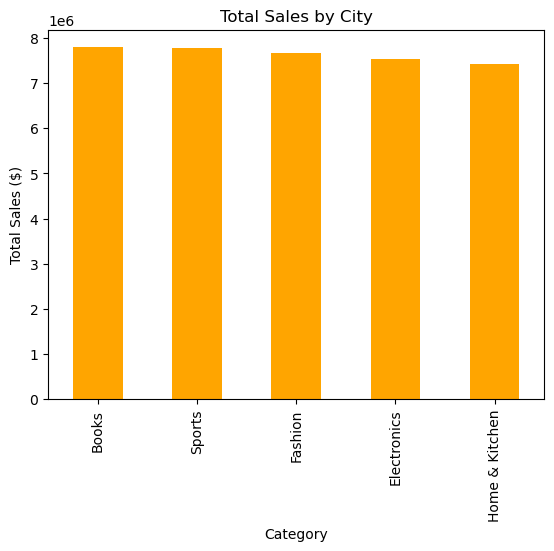

In [22]:
category_sales = df.groupby("Category")["TotalSales"].sum().sort_values(ascending=False)
category_sales.plot(kind="bar",title="Total Sales by City",color="Orange")
plt.ylabel("Total Sales ($)")
plt.show()

Identify top-performing categories to allocate marketing budgets efficiently.

# 2. Which cities generate the highest sales?

In [30]:
city_sales = df.groupby("City")["TotalSales"].sum().sort_values(ascending=False)
city_sales

City
Los Angeles    7729267.06
New York       7638913.43
Chicago        7633142.62
Houston        7595981.16
Phoenix        7584692.56
Name: TotalSales, dtype: float64

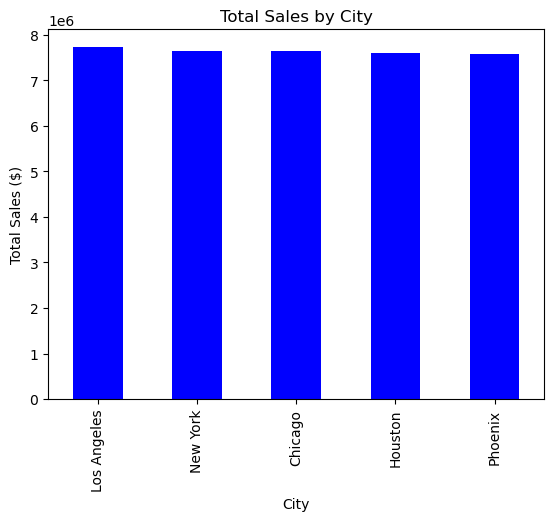

In [32]:
city_sales.plot(kind="bar",title="Total Sales by City", color="blue")
plt.ylabel("Total Sales ($)")
plt.show()

Focus on regions with high demand to optimize delivery and inventory.

# 3. What is the sales trend over time (monthly/weekly)?

In [43]:
df["OrderDate"] = pd.to_datetime(df["OrderDate"])
df["Month"] = df["OrderDate"].dt.to_period("M")

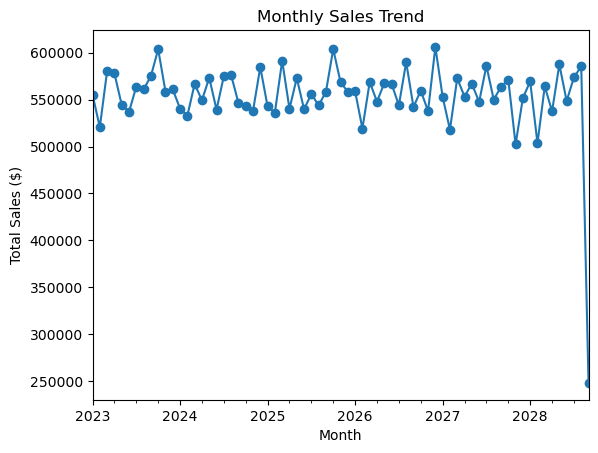

In [49]:
monthly_sales = df.groupby("Month")["TotalSales"].sum()
monthly_sales.plot(kind="line",title="Monthly Sales Trend", marker="o")
plt.ylabel("Total Sales ($)")
plt.show()

Understand seasonal trends to plan promotions and stock levels.

# 4. Who are the top 10 customers by total spending?

In [55]:
top_customers = df.groupby("CustomerID")["TotalSales"].sum().nlargest(10)
top_customers 

CustomerID
CUST2112    14210.16
CUST9978    14008.86
CUST4719    13460.04
CUST1479    13388.83
CUST3188    13339.71
CUST5641    13317.31
CUST4458    13000.31
CUST3868    12968.08
CUST2380    12875.59
CUST6314    12743.49
Name: TotalSales, dtype: float64

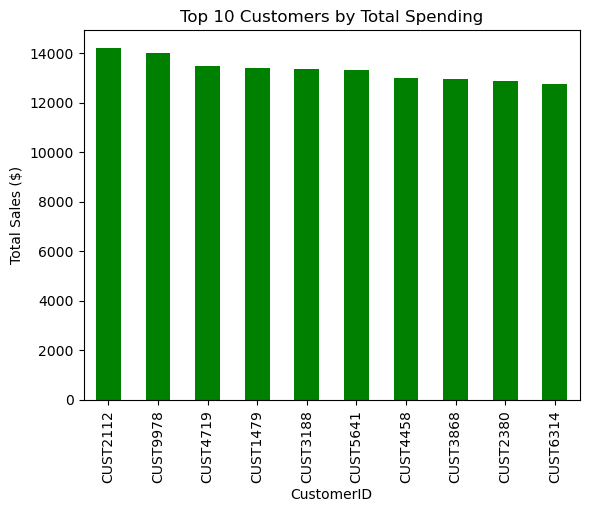

In [58]:
top_customers.plot(kind="bar",title="Top 10 Customers by Total Spending", color="green")
plt.ylabel("Total Sales ($)")
plt.show()

# Build loyalty programs and offer personalized discounts.

# 5. Which products have the highest sales volume?

In [62]:
product_sales = df.groupby("ProductID")["Quantity"].sum().nlargest(10)
product_sales

ProductID
PROD722    240
PROD191    239
PROD995    236
PROD388    234
PROD642    234
PROD583    233
PROD635    233
PROD752    232
PROD484    230
PROD749    230
Name: Quantity, dtype: int64

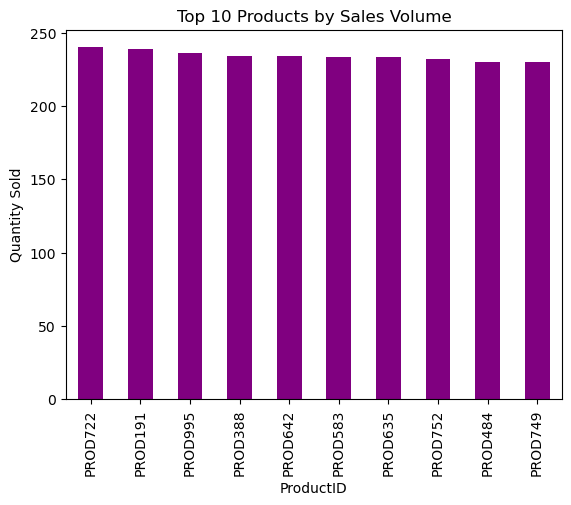

In [64]:
product_sales.plot(kind="bar",title="Top 10 Products by Sales Volume", color="purple")
plt.ylabel("Quantity Sold")
plt.show()

Prioritize production or procurement of high-demand products.

# 6. What is the average order value (AOV)?

In [68]:
aov=df["TotalSales"].mean()
print("Average Order Value : ",round(aov,2))

Average Order Value :  763.64


# 7. What percentage of sales come from repeat customers?

In [74]:
repeat_customers = df["CustomerID"].duplicated().mean()*100

In [76]:
print(f"Percentage of Repeat Customers: {repeat_customers:.2f}%")

Percentage of Repeat Customers: 82.09%


Evaluate customer retention strategies.

# 8. Which day of the week has the highest sales?

In [85]:
df["DayOfWeek"] = df["OrderDate"].dt.day_name()
weekday_sales = df.groupby("DayOfWeek")["TotalSales"].sum().sort_values(ascending =False)

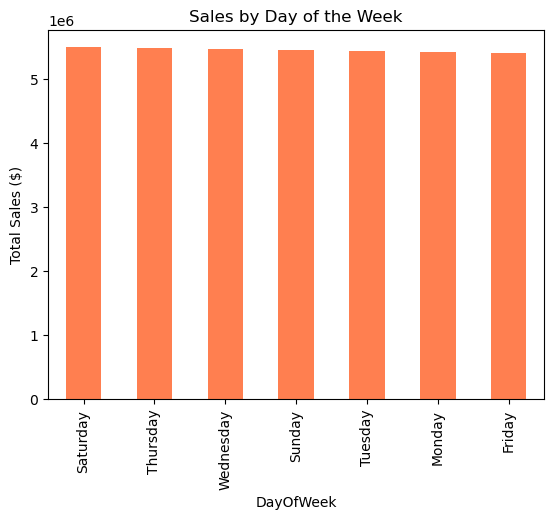

In [86]:
weekday_sales.plot(kind="bar", title="Sales by Day of the Week", color="coral")
plt.ylabel("Total Sales ($)")
plt.show()

Schedule marketing campaigns for maximum impact.

# 9. What is the distribution of sales by price range?

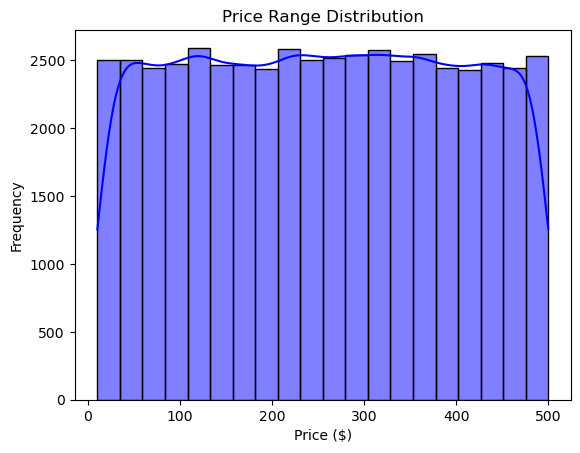

In [88]:
sns.histplot(df["Price"], bins=20, kde=True, color="blue")
plt.title("Price Range Distribution")
plt.xlabel("Price ($)")
plt.ylabel("Frequency")
plt.show()

Identify gaps in price segments and expand offerings.

# 10. How does the quantity purchased vary by category?

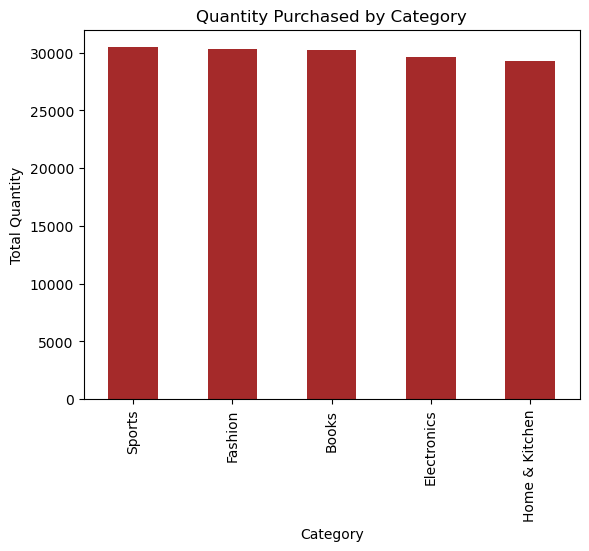

In [90]:
category_quantity = df.groupby("Category")["Quantity"].sum().sort_values(ascending=False)
category_quantity.plot(kind="bar", title="Quantity Purchased by Category", color="brown")
plt.ylabel("Total Quantity")
plt.show()

Predict restocking needs and offer discounts on slow-moving items.

# Insights for Business Growth:

Inventory Management: Focus on top-selling categories and regions to ensure stock availability.
Marketing Campaigns: Schedule promotions on peak sales days and target high-demand cities.
Customer Retention: Build loyalty programs for repeat customers and top spenders.
Revenue Optimization: Analyze price ranges and cross-sell or upsell based on purchasing patterns.